In [1]:
MY_SEED = 55

import sys, os
sys.path.insert(0, os.path.abspath('../dolphyn'))
import dolphyn as D

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


In [7]:
import imp
imp.reload(D)

<module 'dolphyn' from '/home/anna/project/phageomeLib/Public/dolphyn/dolphyn.py'>

In [3]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50) 

In [4]:
#original_seqs = "HQprevalent_northamerica_phages_woX.faa"

In [5]:
feat, labs = D.getPEDSTrainingSet(15)

AUC Test: 0.6825320512820513
AUC OOB: 0.7617274361199973
AUC Whole: 0.9901316131042002 

Accuracy: 0.651685393258427
Precision: 0.3870967741935484
Recall: 0.5
F1: 0.43636363636363634
Confusion Matrix:
 [[92 38]
 [24 24]]


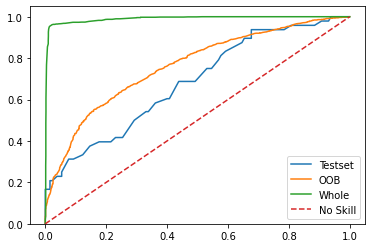

In [9]:
# train the model

clf, splitsets = D.initEpiPredictor(epi_size = 15, testset_size = 0.05)

(X_test, y_test), (X_train, y_train) = splitsets

y_pred_classes =clf.predict_proba(X_test)
y_pred = np.array([classes[1] for classes in y_pred_classes])
y_labs_classes =clf.predict_proba(feat)
pred_labs = np.array([classes[1] for classes in y_labs_classes])
pred_train = np.array(clf.oob_decision_function_)[:,1]

print("AUC Test:",metrics.roc_auc_score(y_test, y_pred))
print("AUC OOB:",metrics.roc_auc_score(y_train, pred_train))
print("AUC Whole:",metrics.roc_auc_score(labs, pred_labs),"\n")

y_pred_bin =(y_pred>0.5)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bin))
print("Precision:",metrics.precision_score(y_test, y_pred_bin))
print("Recall:",metrics.recall_score(y_test, y_pred_bin))
print("F1:",metrics.f1_score(y_test, y_pred_bin))

print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred_bin))

fig_roc, ax_roc = plt.subplots()
fpr, tpr, _ = roc_curve(y_test, y_pred)
fproob, tproob, _ = roc_curve(y_train, pred_train)
fprwhole, tprwhole, _ = roc_curve(labs, pred_labs)
ax_roc.plot(fpr, tpr, label='Testset')
ax_roc.plot(fproob, tproob, label='OOB')
ax_roc.plot(fprwhole, tprwhole, label='Whole')
ax_roc.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
f_score = y_test.value_counts()[1]/len(y_test)
plt.ylim([0.0, 1.05])
plt.savefig('RF_testset_ROC_novel.pdf')  
ax_roc.legend()
plt.show()

In [57]:
#### Important Features for Prediction Module

clf, _ = D.initEpiPredictor(epi_size = 15, random_state=55)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
top = 20
print("\nTop",top,"features\n\n",feature_imp[:top], "\n")



Top 20 features

 d_S                  0.017301
sc_polaruncharged    0.015795
sc_poseleccharged    0.015475
d_K                  0.014419
sc_hydrophobic       0.013685
sc_negeleccharged    0.013019
d_KK                 0.012249
d_I                  0.011053
A                    0.009609
S                    0.009584
d_KS                 0.009584
d_P                  0.009524
P                    0.009435
K                    0.009433
D                    0.009240
E                    0.009190
L                    0.008843
V                    0.008445
d_SK                 0.008332
T                    0.008249
dtype: float64 

